# **Human Development Index**

In [2]:
from google.colab import drive #Mounting our Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #Importing the Data
path = "/content/drive/MyDrive/PPOC Summer Project'22/HDI.csv"
dataset = pd.read_csv(path)

# Dataset is now stored in Pandas Dataframe

#Independent Variables
X_1 = dataset.iloc[0:,0].values #Year
X_1 = X_1.reshape(-1,1)
X_2 = dataset.iloc[0:,1].values #GNI Per Capita (in US$)
X_2 = X_2.reshape(-1,1)
X_3 = dataset.iloc[0:,2].values #Life Expectancy (in Years)
X_3 = X_3.reshape(-1,1)
X_4 = dataset.iloc[0:,3].values #Gross Enrollment Ratio
X_4 = X_4.reshape(-1,1)


#Dependent Variable
Y = dataset.iloc[0:,4].values
Y = Y.reshape(-1,1)

#Y = Y.reshape(-1,1)

In [4]:
 X = np.append(X_1,X_2, axis = 1)
 X = np.append(X, X_3, axis = 1)
 X = np.append(X, X_4, axis = 1)

In [5]:
X #Indepedent Variables

array([[1990.        ,  380.        ,   57.865     ,   91.44030762],
       [1991.        ,  350.        ,   58.353     ,   91.14649963],
       [1992.        ,  340.        ,   58.851     ,   91.4284668 ],
       [1993.        ,  320.        ,   59.349     ,   93.118927  ],
       [1994.        ,  340.        ,   59.84      ,   94.2408905 ],
       [1995.        ,  370.        ,   60.32      ,   93.97062683],
       [1996.        ,  400.        ,   60.783     ,   93.84932709],
       [1997.        ,  410.        ,   61.233     ,   93.48976898],
       [1998.        ,  410.        ,   61.669     ,   91.877388  ],
       [1999.        ,  440.        ,   62.093     ,   92.56268311],
       [2000.        ,  440.        ,   62.505     ,   94.27111816],
       [2001.        ,  450.        ,   62.907     ,   94.1149292 ],
       [2002.        ,  460.        ,   63.304     ,   94.74552917],
       [2003.        ,  520.        ,   63.699     ,  102.6829071 ],
       [2004.        ,  610.      

In [6]:
Y

array([[0.429],
       [0.433],
       [0.44 ],
       [0.446],
       [0.453],
       [0.461],
       [0.468],
       [0.474],
       [0.481],
       [0.489],
       [0.495],
       [0.499],
       [0.506],
       [0.518],
       [0.527],
       [0.536],
       [0.546],
       [0.555],
       [0.563],
       [0.569],
       [0.579],
       [0.588],
       [0.597],
       [0.604],
       [0.616],
       [0.624],
       [0.63 ],
       [0.64 ],
       [0.642],
       [0.645],
       [0.647]])

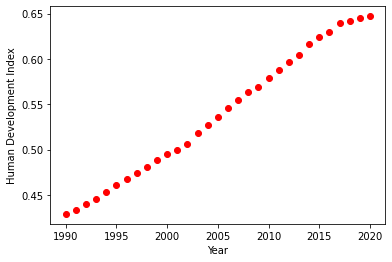

In [7]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Human Development Index')
plt.scatter(dataset.Year, dataset.HDI, color = 'red')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [9]:
X_train.shape

(24, 4)

In [10]:
X_test

array([[2017.       , 1820.       ,   69.165    ,  112.9578629],
       [1993.       ,  320.       ,   59.349    ,   93.118927 ],
       [2009.       , 1120.       ,   66.244    ,  109.4510727],
       [2013.       , 1520.       ,   67.931    ,  110.583313 ],
       [2012.       , 1480.       ,   67.545    ,  109.7612991],
       [2011.       , 1360.       ,   67.13     ,  108.3233566],
       [2010.       , 1220.       ,   66.693    ,  109.1013718]])

In [11]:
Y_test

array([[0.64 ],
       [0.446],
       [0.569],
       [0.604],
       [0.597],
       [0.588],
       [0.579]])

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#from sklearn.tree import DecisionTreeRegressor
#regressor = DecisionTreeRegressor(random_state = 0)
#regressor.fit(X_train, Y_train)

# Got an accuracy of around 90.6253% while using Decision Tree Regressor

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
#regressor.fit(X_train, Y_train)

# Got an accuracy of around 93.9737% while using Random Forest Regressor

In [13]:
X_test

array([[2017.       , 1820.       ,   69.165    ,  112.9578629],
       [1993.       ,  320.       ,   59.349    ,   93.118927 ],
       [2009.       , 1120.       ,   66.244    ,  109.4510727],
       [2013.       , 1520.       ,   67.931    ,  110.583313 ],
       [2012.       , 1480.       ,   67.545    ,  109.7612991],
       [2011.       , 1360.       ,   67.13     ,  108.3233566],
       [2010.       , 1220.       ,   66.693    ,  109.1013718]])

In [14]:
Y_test

array([[0.64 ],
       [0.446],
       [0.569],
       [0.604],
       [0.597],
       [0.588],
       [0.579]])

In [15]:
Y_pred = regressor.predict(X_test)
Y_pred

array([[0.63797872],
       [0.44650944],
       [0.57380289],
       [0.60966688],
       [0.60261565],
       [0.59259153],
       [0.58278141]])

In [16]:
Y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9943580986366488

### Hence we were successful in implementing a **Linear Regression** model with an accuracy of **99.435%  to predict the HDI of India** using the given data (World Bank).